# SIR model

$$\frac{dS(t)}{dt} = - \beta SI $$

$$\frac{dI(t)}{dt} = \beta SI - rI $$

$$\frac{dR(t)}{dt} = rI $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils_pde.utils_pde import execute_experiment, generate_plot, plot_phase_plane

In [2]:
def model_sir(y, t, beta, r):
    St, It, Rt = y
    dS = -beta*St*It
    dI = beta*St*It - r*It
    dR = r*It
    return [dS, dI, dR]


def model_sir2(y, t, beta, r):
    St, It  = y
    dS = -beta*St*It
    dI = beta*St*It - r*It
    return [dS, dI]

In [36]:
t = np.linspace(1, 30, 5000)

s0, i0, r0 = 0.99, 0.01, 0

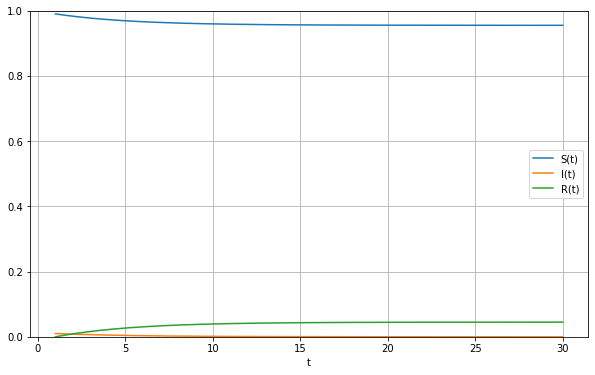

R0 = 0.8


In [37]:
beta, r = 0.8, 1
args = (beta, r)

solution = execute_experiment(model_sir, [s0, i0, r0], t, args)
generate_plot(t, solution, labels = ['S(t)', 'I(t)', 'R(t)'], show=False)
plt.ylim([0,1])
plt.show()

print(f'R0 = {beta/r}')

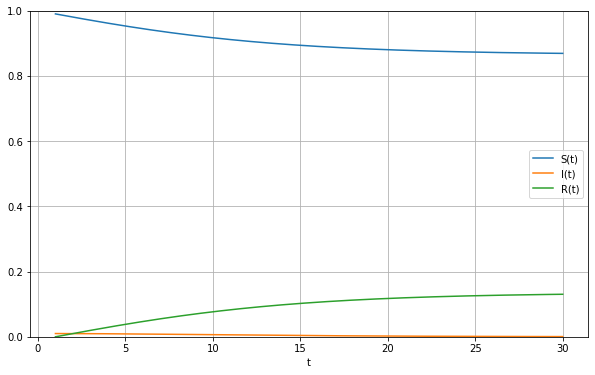

R0 = 1.0


In [38]:
beta, r = 1, 1
args = (beta, r)

solution = execute_experiment(model_sir, [s0, i0, r0], t, args)
generate_plot(t, solution, labels = ['S(t)', 'I(t)', 'R(t)'], show=False)
plt.ylim([0,1])
plt.show()

print(f'R0 = {beta/r}')

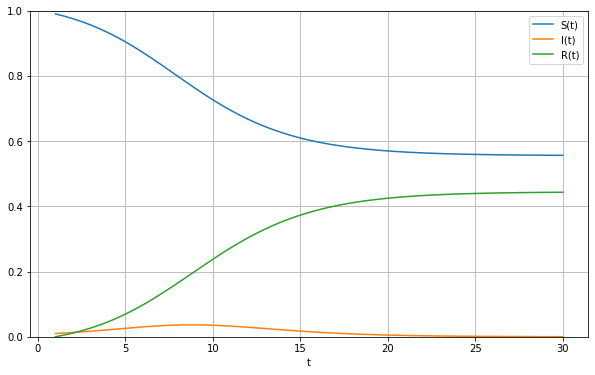

R0 = 1.3


In [39]:
beta, r = 1.3, 1
args = (beta, r)

solution = execute_experiment(model_sir, [s0, i0, r0], t, args)
generate_plot(t, solution, labels = ['S(t)', 'I(t)', 'R(t)'], show=False)
plt.ylim([0,1])
plt.show()

print(f'R0 = {beta/r}')

# Two dimensional SIR model

$$\frac{dS(t)}{dt} = - \beta SI $$

$$\frac{dI(t)}{dt} = \beta SI - rI $$

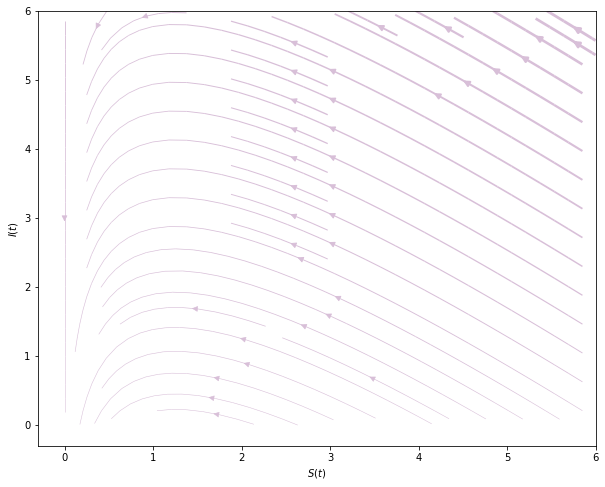

In [23]:
beta, r = 0.8, 1
args = (beta, r)

fig, ax = plt.subplots(1, 1, figsize = (10, 8))

ax.set_xlabel('$S(t)$')
ax.set_ylabel('$I(t)$')

_ = plot_phase_plane(ax, model_sir2, (0, 6), (0, 6), args = args)

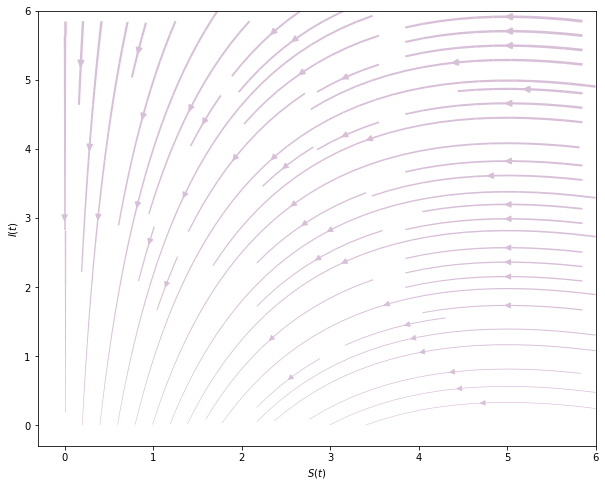

In [24]:
beta, r = 0.3, 1.5
args = (beta, r)

fig, ax = plt.subplots(1, 1, figsize = (10, 8))

ax.set_xlabel('$S(t)$')
ax.set_ylabel('$I(t)$')

_ = plot_phase_plane(ax, model_sir2, (0, 6), (0, 6), args = args)

# Total number of infected

Total number of infected = $ \lim_{t->\infty}{1 - S(t)} $

In [57]:
def total_number_of_infected(r0):
    beta, r = r0, 1
    args = (beta, r)
    solution = execute_experiment(model_sir, [s0, i0, r0], t, args)
    return 1 - solution[-1, 0]

In [68]:
r0s = np.linspace(0, 3, 100)
total_numbers_of_infected = [total_number_of_infected(i) for i in r0s]

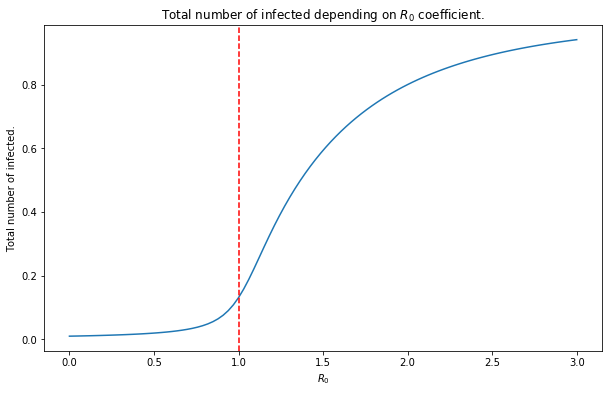

In [75]:
plt.figure(figsize = (10, 6))

plt.plot(r0s, total_numbers_of_infected)
plt.axvline(x = 1, color='red', linestyle='--')
plt.title('Total number of infected depending on $R_0$ coefficient.')
plt.xlabel('$R_0$')
plt.ylabel('Total number of infected.')

plt.show()